--- 
# SVM (Support Vector Machine)
- 서포트 벡터를 구해서 선을 그린다 

<img src = "../Data/svm-01.png"/>

### SVM을 활용한 비만도(BMI) 예측 
BMI = 몸무게(kg) / 키(m) * 키(m)     
BMI가 18.5 이상 25 미만일때가 표준 몸무게 

In [1]:
# 데이터를 획득하기 위해 무작위로 2만명 데이터를 생성 
# 키(cm), 몸무게(kg), label(저체중thin, 정상체중normal, 비만fat) 컬럼으로 이루어진 csv 생성 

import random 

# BMI를 계산해서 Label return 함수 
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2 
    # return은 아래로 안내려옴 그냥 쓰면 된다. 
    if bmi < 18.5 : return 'thin'
    if bmi < 25 : return 'normal'
    return 'fat'

# 저장 파일 준비하기 
fp = open("../Data/bmi.csv", 'w', encoding='utf-8')
fp.write('height,weight,label\r\n') # 스페이스 하면 안됨! 

# 무작위로 데이터 생성하기 
cnt = {'thin':0, "normal":0, 'fat':0}
for i in range(20000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = calc_bmi(h,w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h,w,label))
fp.close()
print("ok : ", cnt)





ok :  {'thin': 6562, 'normal': 5892, 'fat': 7546}


### BMI공식을 사용하지 않고 BMI 예측 

In [2]:
import pandas as pd 

In [3]:
# 위에서 만든 데이터 불러오기 
tbl = pd.read_csv("../Data/bmi.csv")
tbl.head()

,height,weight,label
0,150,53,normal
1,121,59,fat
2,196,61,thin
3,185,56,thin
4,176,59,normal


In [4]:
# 컬럼을 분리하여 정규화 하기 
# - 컬럼 내에서 크기가 차이가 많으면 함. 
tbl.describe()
# - 크게 차이가 나지 않는군.. 근데 그냥 하기로 함 

,height,weight
count,20000.000000,20000.000000
mean,160.224400,57.341450
std,23.294857,13.289191
min,120.000000,35.000000
25%,140.000000,46.000000
50%,160.000000,57.000000
75%,180.000000,69.000000
max,200.000000,80.000000


In [5]:
tbl.head()

,height,weight,label
0,150,53,normal
1,121,59,fat
2,196,61,thin
3,185,56,thin
4,176,59,normal


In [6]:
label = tbl['label']

In [7]:
# 몸무게, 키 컬럼 정규화 하기 
w = tbl['weight'] / 80 #최대값으로 나눠서 정규화 해줌  
h = tbl['height'] / 200


In [8]:
# 정규화한 데이터 다시 합치기 
tbl_data = pd.concat([h,w], axis = 1)
tbl_data.head()

,height,weight
0,0.750,0.6625
1,0.605,0.7375
2,0.980,0.7625
3,0.925,0.7000
4,0.880,0.7375


In [9]:
# TrainData / TestData 나누기 
from sklearn.model_selection import train_test_split 

test_data, train_data, test_label, train_label = train_test_split(
    tbl_data, label, 
    random_state=0,
    stratify=label
)

In [10]:
len(test_data) == len(test_label)

True

In [11]:
label.value_counts()

fat       7546
thin      6562
normal    5892
Name: label, dtype: int64

In [12]:
train_label.value_counts()

fat       1887
thin      1640
normal    1473
Name: label, dtype: int64

In [13]:
test_label.value_counts()

fat       5659
thin      4922
normal    4419
Name: label, dtype: int64

In [14]:
# 학습하기 
from sklearn.svm import SVC

# 인스턴스 만들기
clf = SVC()

clf.fit(train_data, train_label)

SVC()

In [15]:
# 정확도 구하기 
clf.score(test_data, test_label)

0.9900666666666667

In [16]:
# 예측하기 
pred = clf.predict(test_data)

In [17]:
# Confusion Matrix 출력하기 
from sklearn import metrics 
cl_report = metrics.classification_report(test_label, pred)
print(cl_report)

              precision    recall  f1-score   support

         fat       1.00      0.99      0.99      5659
      normal       0.98      0.99      0.98      4419
        thin       0.99      0.99      0.99      4922

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



### 시각화

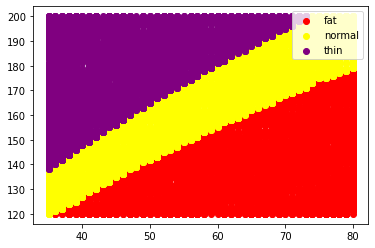

In [18]:
# 데이터 분포 확인을 위한 시각화 
import matplotlib.pyplot as plt 
tbl = pd.read_csv("../Data/bmi.csv", index_col=2)  # 이거 안하면 b 정할 때 컬럼 이름 지정해서 조건 넣어도 됨 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl, color): 
    b = tbl.loc[lbl]
    ax.scatter(b['weight'], b['height'], c = color, label = lbl)

scatter('fat', 'red')
scatter('normal','yellow')
scatter('thin','purple')
ax.legend()
plt.savefig("../Data/bmi-test.png")
plt.show()

--- 
## SVM의 종류 
- SVC(Classification)    
- NuSVC : "     
- LinearSVC : SVM 중에서 가장 빠름, SVC 대비 약 3배 빠름 


In [19]:
# LinearSVC로 데이터 학습하기 
from sklearn.svm import LinearSVC
clf = LinearSVC()
# 학습하기 
clf.fit(train_data, train_label)

LinearSVC()

In [20]:
# 정확도 구하기 
clf.score(train_data, train_label)

0.8946

In [21]:
# 예측하기 
pred = clf.predict(test_data)

In [22]:
# Confusion Matrix 출력하기 
from sklearn import metrics 
cl_report = metrics.classification_report(test_label, pred)
print(cl_report)

              precision    recall  f1-score   support

         fat       0.87      1.00      0.93      5659
      normal       1.00      0.64      0.78      4419
        thin       0.87      1.00      0.93      4922

    accuracy                           0.89     15000
   macro avg       0.91      0.88      0.88     15000
weighted avg       0.91      0.89      0.89     15000



> 빨라지는데, 정확도는 떨어짐.     
> 데이터 더 많게 되면 올라간다고 함.  